# Pearson Product-Moment Correlation

The Pearson product-moment correlation coefficient (Pearson’s r) is a **standardized measure of covariance**. It rescales covariance by the variability of each variable, producing a unit-free statistic bounded between **−1 and +1**.

Pearson’s correlation measures the **strength and direction of a linear relationship** between two **quantitative** variables.

Because it is scale-independent, Pearson’s r allows comparison of linear associations across different variable pairs and datasets. Conceptually, it evaluates how closely the observed data points align with a straight-line relationship, not the slope of that line.

---

## Structural assumptions and practical considerations

Before interpreting Pearson’s correlation, the following conditions should be considered:

- Both variables are quantitative (interval or ratio scale).
- Each observation consists of a paired value $(x_i, y_i)$.
- The relationship between variables is approximately **linear**.
- Observations are independent (one data pair does not influence another).
- Extreme outliers should be investigated, as Pearson’s r is sensitive to them and they can disproportionately influence the coefficient.

Linearity is the **key structural assumption**. If the relationship is non-linear, Pearson’s correlation may be close to zero even when a strong relationship exists.

---

## The most misunderstood assumption in statistics

A widespread misconception is that variables must be **normally distributed** to use Pearson’s correlation coefficient. This is **not true**.

Pearson’s r does **not** require normality to be computed or interpreted as a descriptive measure of linear association.

For example, if:

- $x = [5, 6, 7, 8, 9]$
- $y = [10, 12, 14, 16, 18]$

The relationship is perfectly linear $(r = +1)$, even though neither variable follows a normal distribution.

Normality assumptions apply **only when making statistical inferences** about the correlation coefficient, such as hypothesis tests or confidence intervals. They are not a prerequisite for computing or interpreting the coefficient itself.

---

## Interpreting the correlation coefficient

Pearson’s r ranges from **−1 to +1**:

- Values close to **+1** indicate a strong positive linear relationship: as one variable increases, the other tends to increase.
- Values close to **−1** indicate a strong negative linear relationship: as one variable increases, the other tends to decrease.
- Values close to **0** indicate that a linear model does not adequately describe the relationship. A strong relationship may still exist in a non-linear form.

A correlation near zero does **not** imply that the variables are independent or unrelated. The relationship may exist but be **non-linear**, in which case Pearson’s correlation is not an appropriate summary measure.

---

## Correlation versus causation

Pearson’s correlation coefficient measures **association**, not causality.

A strong correlation does not imply that changes in one variable cause changes in the other. Causal interpretation requires additional assumptions, experimental design, or causal modeling beyond correlation analysis.

---


In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
data_folder = Path('../../datasets/')
data_set = data_folder / 'world_happiness.csv'
df = pd.read_csv(data_set, sep=';', decimal=',')
df.head()

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,Western Europe,7.587,8.26132,0.96240,73,0.99379,0.37289,0.23941,2015
1,2,Iceland,Western Europe,7.561,7.70416,1.00000,73,0.93884,0.54819,0.74371,2015
2,3,Denmark,Western Europe,7.527,7.84114,0.97030,70,0.96962,0.42894,0.12382,2015
3,4,Norway,Western Europe,7.522,8.63100,0.94917,71,1.00000,0.43598,0.33860,2015
4,5,Canada,North America and ANZ,7.427,7.84595,0.94322,71,0.94511,0.57560,0.40285,2015


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ranking                       1502 non-null   int64  
 1   Country                       1502 non-null   object 
 2   Regional indicator            1499 non-null   object 
 3   Happiness score               1502 non-null   float64
 4   GDP per capita                1502 non-null   float64
 5   Social support                1502 non-null   float64
 6   Healthy life expectancy       1502 non-null   int64  
 7   Freedom to make life choices  1502 non-null   float64
 8   Generosity                    1502 non-null   float64
 9   Perceptions of corruption     1502 non-null   float64
 10  Year                          1502 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 129.2+ KB


**Exploratory correlation analysis**

We begin by exploring whether variables exhibit linear associations with the Happiness score. At this stage, correlation is used as a descriptive and hypothesis-generating tool.

### Happiness vs Generosity

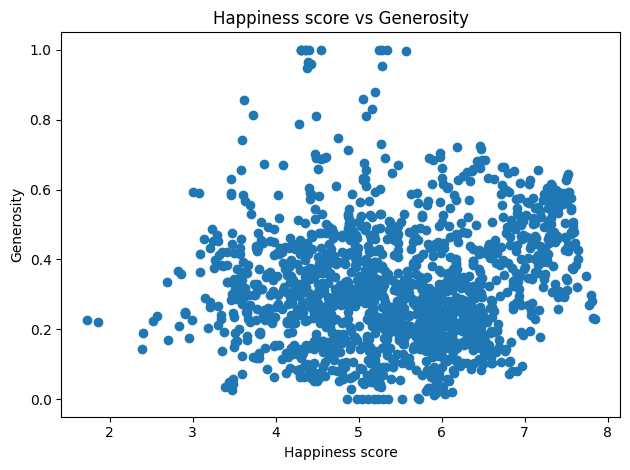

In [4]:
fig, ax = plt.subplots()
ax.scatter(df['Happiness score'], df['Generosity'])

plt.title('Happiness score vs Generosity')
plt.xlabel('Happiness score')
plt.ylabel('Generosity')
plt.tight_layout()
plt.show()

In [5]:
r, _ = pearsonr(df['Happiness score'], df['Generosity'])
print('Happiness vs Generosity correlation coefficient:', r)

Happiness vs Generosity correlation coefficient: 0.10555770308100883


The scatterplot suggests a weak linear association between Happiness score and Generosity. Pearson’s correlation coefficient confirms this visual assessment, indicating a low magnitude linear relationship.

This result suggests that Generosity alone does not explain much of the variation in Happiness score through a linear relationship. However, this does not rule out non-linear effects, interaction with other variables, or contextual factors at the country level.


### Happiness score vs GDP per capita

GDP per capita is commonly hypothesized to be associated with subjective well-being. We examine whether this relationship exhibits a linear structure suitable for Pearson’s correlation.


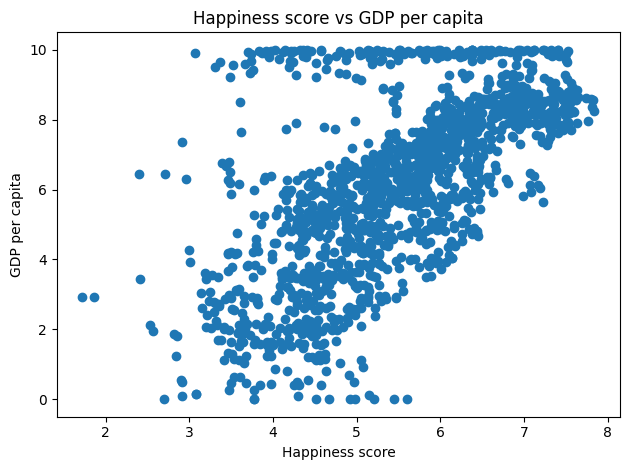

In [6]:
fig, ax = plt.subplots()
ax.scatter(df['Happiness score'], df['GDP per capita'])

plt.title('Happiness score vs GDP per capita')
plt.xlabel('Happiness score')
plt.ylabel('GDP per capita')
plt.tight_layout()
plt.show()

In [7]:
r, _ = pearsonr(df['Happiness score'], df['GDP per capita'])
print('Happiness vs GDP per capita correlation coefficient:', r)

Happiness vs GDP per capita correlation coefficient: 0.6313531137215621


The scatterplot reveals some kind of positive linear trend between GDP per capita and Happiness score. Pearson’s correlation coefficient indicates a moderate to strong positive linear association.

This suggests that higher GDP per capita tends to be **associated** with higher reported happiness across countries. This result is descriptive and does not imply that GDP per capita causes changes in happiness, as the relationship may be influenced by **confounding** social, cultural, or institutional factors.


# Correlation matrix
Rather than examining pairwise relationships in isolation, we can compute a correlation matrix to summarize linear associations across multiple variables simultaneously. This provides a high-level view of potential relationships worth deeper investigation.


In [8]:
df.loc[:, 'Happiness score':'Perceptions of corruption'].corr(method='pearson')

,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Happiness score,1.000000,0.631353,0.744092,0.659959,0.591207,0.105558,0.071776
GDP per capita,0.631353,1.000000,0.575657,0.613080,0.296667,-0.077251,-0.092048
Social support,0.744092,0.575657,1.000000,0.545270,0.432634,0.019139,0.094344
Healthy life expectancy,0.659959,0.613080,0.545270,1.000000,0.353846,0.011184,-0.204177
Freedom to make life choices,0.591207,0.296667,0.432634,0.353846,1.000000,0.276411,0.121293
Generosity,0.105558,-0.077251,0.019139,0.011184,0.276411,1.000000,0.069459
Perceptions of corruption,0.071776,-0.092048,0.094344,-0.204177,0.121293,0.069459,1.000000
